## GoGet Recommendation System

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns

Reading the Data

In [207]:
data = pd.read_csv('/home/dhanush/Downloads/Test_dataset_3.csv')

Printing the first 5 entries

In [208]:
data.head()

,Shop Name,Avalability,Distance,Rating,Total bill
0,M M Pai General Stores,1,2.3,2.2,195
1,D.M General Stores,1,3.9,3.3,190
2,Kalpavruksha Provision Store,0,3.9,2.7,160
3,Sri laxmi stores,1,0.6,4.7,190
4,Maqbool Store,1,1.1,2.0,198


Printing the information of the Dataset

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Shop Name    100 non-null    object 
 1   Avalability  100 non-null    int64  
 2   Distance     100 non-null    float64
 3   Rating       100 non-null    float64
 4   Total bill   100 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


To understand the range of each rating, a bargraph is plotted.

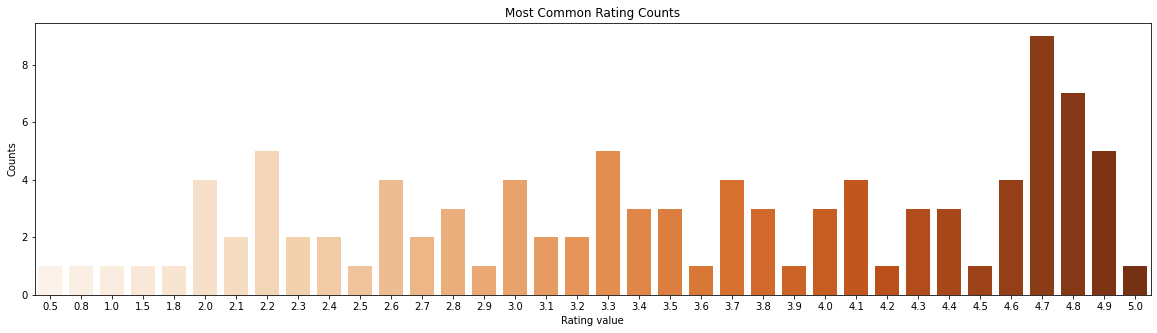

In [210]:
rating_counts = data.Rating.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Oranges")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Most Common Rating Counts");

To understand the Availability, another bargraph is plotted.

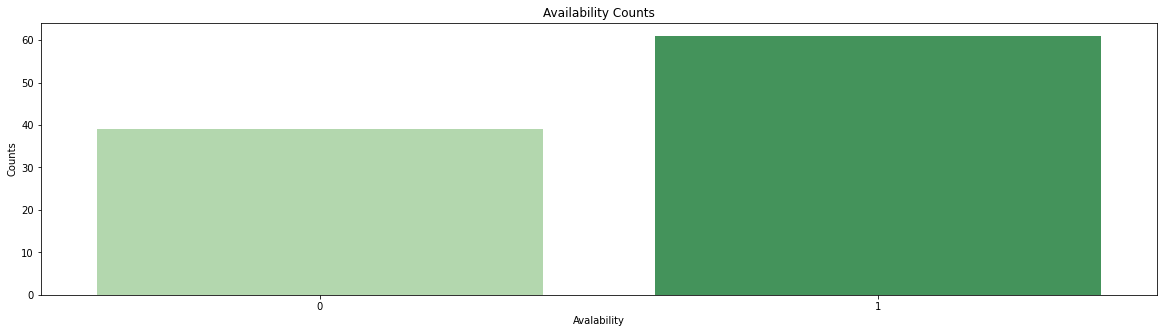

In [211]:
Availability_counts = data.Avalability.value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x=Availability_counts.index, y=Availability_counts.values, palette="Greens")
plt.xlabel("Avalability")
plt.ylabel("Counts")
plt.title("Availability Counts");

In [212]:
#Converting the dataframe into a list.
df = data.values.tolist()

In [213]:
#Finding the median of the Total Bill across the shops.
total_bill = []
for i in range(len(df)):
    if(df[i][1]==1):
        total_bill.append(df[i][4])
median = sorted(total_bill)[len(total_bill)//2]
print("Median is "+str(median))        

Median is 195


In [214]:
#Calculating Final score using the GoGet formula.
for i in range(len(df)):
  fs = 0
  d=0
  if(df[i][1]==1):
      if(df[i][4]<=median):
        d = 5//(df[i][2])
        fs = df[i][3] *20+ (median - df[i][4]) + d
        df[i].append(fs)  
      else:
        d = 5//(df[i][2])
        fs = df[i][3] *20 + (median - df[i][4])  +d
        df[i].append(fs)  
  else:
      df[i].append(0) 

In [215]:
dataset = pd.DataFrame(df, columns = ['Shop_name', 'Availability','Distance','Rating','Total_bill','Final_score'])

Printing the new dataset along with the Final score

In [216]:
dataset.head()

,Shop_name,Availability,Distance,Rating,Total_bill,Final_score
0,M M Pai General Stores,1,2.3,2.2,195,46.0
1,D.M General Stores,1,3.9,3.3,190,72.0
2,Kalpavruksha Provision Store,0,3.9,2.7,160,0.0
3,Sri laxmi stores,1,0.6,4.7,190,107.0
4,Maqbool Store,1,1.1,2.0,198,41.0


In [217]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_name     100 non-null    object 
 1   Availability  100 non-null    int64  
 2   Distance      100 non-null    float64
 3   Rating        100 non-null    float64
 4   Total_bill    100 non-null    int64  
 5   Final_score   100 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.8+ KB


In [218]:
df = dataset.values.tolist()

Assigning classes to each shop based on the Final score.

In [219]:
for i in range(len(df)):
    if(df[i][5]>=100):
        df[i].append('1')
    elif(80<=df[i][5]<100):
        df[i].append('2')
    elif(60<=df[i][5]<80):
        df[i].append('3')
    elif(40<=df[i][5]<60):
        df[i].append('4')
    elif(0<=df[i][5]<40):
        df[i].append('5')    

In [193]:
dataset = pd.DataFrame(df, columns = ['Shop_name', 'Availability','Distance','Rating','Total_bill','Final_score','Class'])
dataset.head()

,Shop_name,Availability,Distance,Rating,Total_bill,Final_score,Class
0,M M Pai General Stores,1,2.3,2.2,195,46.0,4
1,D.M General Stores,1,3.9,3.3,190,72.0,3
2,Kalpavruksha Provision Store,0,3.9,2.7,160,0.0,5
3,Sri laxmi stores,1,0.6,4.7,190,107.0,1
4,Maqbool Store,1,1.1,2.0,198,41.0,4


In [194]:
X=dataset.iloc[:,5:-1].values
y=dataset.iloc[:, 6].values

Performing train test split on the dataset.

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=60)

Preprocessing the dataset using StandardScaler.

In [196]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Applying KNN algorithm 

In [197]:

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [198]:
#Calculating y_pred
y_pred = classifier.predict(X_test)

In [199]:
#Finding the Accuracy, precision, recall, f1-score and support
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         6
           4       0.89      1.00      0.94         8
           5       1.00      0.92      0.96        12

    accuracy                           0.95        40
   macro avg       0.88      0.97      0.90        40
weighted avg       0.97      0.95      0.95        40



In [200]:
#Printing multiclass confusion matrix
print(confusion_matrix(y_test, y_pred))

[[ 1  0  0  0  0]
 [ 1 12  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  8  0]
 [ 0  0  0  1 11]]


In [203]:
rec = []
final = dataset.values.tolist()
final.sort(key = lambda x: x[5], reverse=True)

### Top 10 recommendations using GoGet Recommendation System

In [205]:
for i in range(0,10):
    print(final[i])

['Pacchu Kiraani Stores', 1, 4.9, 4.7, 180, 110.0, '1']
['Sri laxmi stores', 1, 0.6, 4.7, 190, 107.0, '1']
["Babanna's Shop", 1, 0.8, 4.7, 190, 105.0, '1']
['Karnataka General\xa0STORE', 1, 0.7, 4.8, 195, 103.0, '1']
['shobha store', 1, 1.4, 4.6, 190, 100.0, '1']
['Shhravan Grocery\xa0Store', 1, 4.5, 4.6, 188, 100.0, '1']
['SPB store', 1, 2.9, 4.8, 194, 98.0, '2']
['Shri Gurusai Stores', 1, 1.3, 4.9, 198, 98.0, '2']
['S.N.M Stores', 1, 4.1, 4.8, 195, 97.0, '2']
['Ragavendra provision store', 1, 3.3, 4.4, 188, 96.0, '2']
